In [9]:
# Import Dependancies
import hvplot.pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np



In [10]:
# Create a file path for the cleaned csv file
path = 'Resources/Cleaned_Crimes_-_2016_to_present.csv'

# Read csv file with pandas
cleaned_crime_data = pd.read_csv(path, encoding='ISO-8859-1')

# Check the dataframe
cleaned_crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


### Plotting all crimes for the complete time period 
Firstly, we wanted to see if we could understand how crime was affected by the pandemic in general terms. 

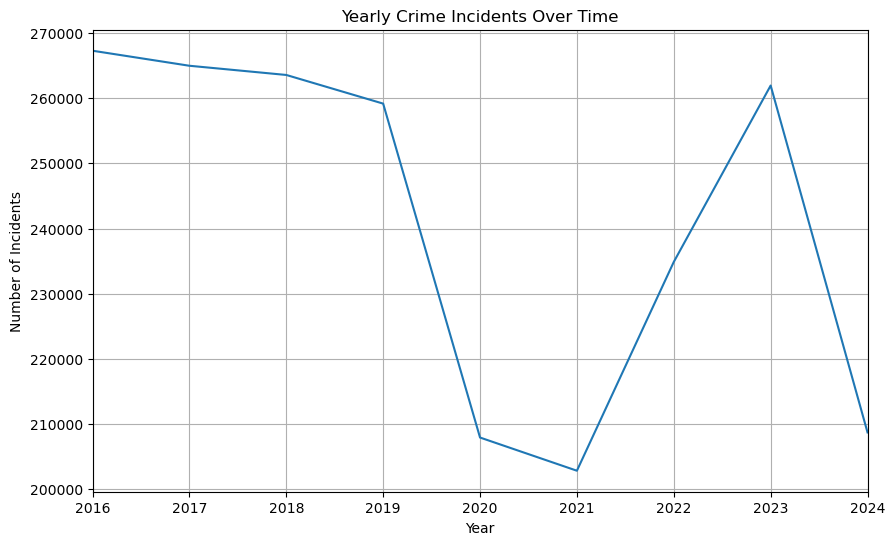

In [11]:
# Create a copy of the dataframe to work with
yearly_data = cleaned_crime_data.copy()

# Change the 'Date' column to the datetime format
yearly_data['Date'] = pd.to_datetime(yearly_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Reset the index for plotting and resampling
yearly_data.set_index('Date', inplace=True)

# Resample data to get yearly counts 
yearly_data = yearly_data.resample('YE').size() 

# Plot the data 
plt.figure(figsize=(10, 6)) 
yearly_data.plot(kind='line') 

# Format the chart
plt.title('Yearly Crime Incidents Over Time') 
plt.xlabel('Year') 
plt.ylabel('Number of Incidents')
plt.grid(True)

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Yearly_Crime_Incidents.png')

# Display the chart
plt.show()

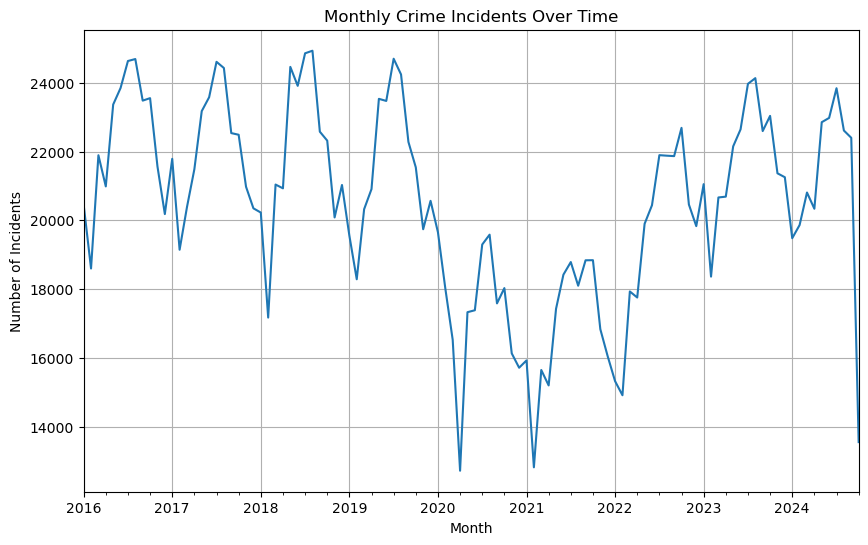

In [12]:
# Create a copy of the dataframe to work with
monthly_data = cleaned_crime_data.copy()

# Change the 'Date' column to the datetime format
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Reset the index for plotting and resampling
monthly_data.set_index('Date', inplace=True)

# Resample data to get yearly counts 
monthly_data = monthly_data.resample('ME').size() 

# Plot the data 
plt.figure(figsize=(10, 6)) 
monthly_data.plot(kind='line') 

# Format the chart
plt.title('Monthly Crime Incidents Over Time') 
plt.xlabel('Month') 
plt.ylabel('Number of Incidents')
plt.grid(True)

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Monthly_Crime_Incidents.png')

# Display the chart
plt.show()

## Plotting Hot Spots
#### Step 1: Create an altered pandas DataFrame to replace different lat and lon
Alter the data to be grouped by the block and then replace all long and lat values to the max of that group

In [13]:
# Create a copy of the cleaned_crime_data for alterations
altered_crime_data = cleaned_crime_data.copy()

# Group by 'Block' and then using the aggregate function to get the max 'Latitude' and 'Longitude'
agg_df = altered_crime_data.groupby('Block').agg({
    'Latitude': 'max', 
    'Longitude': 'max'
}).reset_index()

# Merge the aggregated max latitude and longitude back into the original DataFrame
altered_crime_data = altered_crime_data.merge(agg_df, on='Block', suffixes=('', '_max'))

# Replace the 'Latitude' and 'Longitude' with the max values for each block
altered_crime_data['Latitude'] = altered_crime_data['Latitude_max']
altered_crime_data['Longitude'] = altered_crime_data['Longitude_max']

# Drop the temporary columns
altered_crime_data.drop(columns=['Latitude_max', 'Longitude_max'], inplace=True)

altered_crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755951,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995260,-87.713310,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952365,-87.676585,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.738009,-87.604834,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


#### Step 2: Find the value to search

optionally, you can choose a specific primary type if you want to analysis a specific type of crime. Otherwise, skip this cell.

In [14]:
# Group by 'Primary Type' and get the count of each primary type
top_4_crimes = altered_crime_data.groupby('Primary Type').size()

# Sort values in ascending order and reassign into a list to reference
top_4_crimes = top_4_crimes.sort_values(ascending=True)

# Get only the top 4 crimes
top_4_crimes = top_4_crimes[-4:]

# Convert the Series into a DataFrame and reset the index
top_4_crimes_df = top_4_crimes.reset_index(name='Total Incidents')

# Print the new DataFrame
print(f"You want to find a specific value, which is one of these options:")
top_4_crimes_df

You want to find a specific value, which is one of these options:


,Primary Type,Total Incidents
0,ASSAULT,179954
1,CRIMINAL DAMAGE,243963
2,BATTERY,402701
3,THEFT,489381


In [15]:
# Input the specific value you want to analyze
specific_value = 'All Crimes' 

# Uncomment if you want to analysis a specific type of crime hotspots
# prim_type = altered_crime_data[altered_crime_data['Primary Type'] == specific_value.upper()].copy()

# find all crimes
prim_type = altered_crime_data.copy()
prim_type.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755951,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995260,-87.713310,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952365,-87.676585,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.738009,-87.604834,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


#### Step 2: Start setting up plotting variables
Now, with both the specific value to search defined and the new filtered pandas DataFrame, we can start to work on getting datetime set up to define the pandemic periods

In [16]:
# We need to convert 'Date' column to datetime format in the new, filtered dataframe
prim_type['Date'] = pd.to_datetime(prim_type['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
# Define pandemic periods
prim_type['Pandemic Period'] = pd.cut(
    prim_type['Date'],
    bins=[
        pd.Timestamp('2017-01-01'),
        pd.Timestamp('2020-01-31'),
        pd.Timestamp('2023-05-11'),

        # Added specific date of the last update for the dataset before downloading
        # Because the bins are exclusive, I made the date one day above the update date
        pd.Timestamp('2024-10-26'), 
    ],
    labels=['Before Pandemic', 'During Pandemic', 'After Pandemic'],

    # This makes the right edge of each bin exclusive which means the first bin will not include the secnod timestamp date.
    # It will only put in values that are up to that date. (example: bin 2 will group all dates from 2020-01-32 to 2023-05-10)
    right = False 
)
# Basic stats and summary by period
print(prim_type.info())
print(prim_type.groupby('Pandemic Period').size())

# Filter data for relevant columns
# Added the block column to count and define our hotspots
# Added 
crime_location_data = prim_type[['Date', 'Primary Type', 'Description', 'Location Description', 'Block', 'Year', 'Arrest', 'Latitude', 'Longitude', 'Pandemic Period']].dropna()

crime_location_data = crime_location_data[
    (crime_location_data['Latitude'] != 0.0) & # Removes any undifined/missing latitude values
    (crime_location_data['Longitude'] != 0.0) & # Removes any undifined/missing longitude values
    (crime_location_data['Latitude'] > 37.0) # Removes unfortunate outlier
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  int64         
 19  

C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\2198493212.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(prim_type.groupby('Pandemic Period').size())


C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\3640000261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_period_chart = prim_type.groupby('Pandemic Period').size()


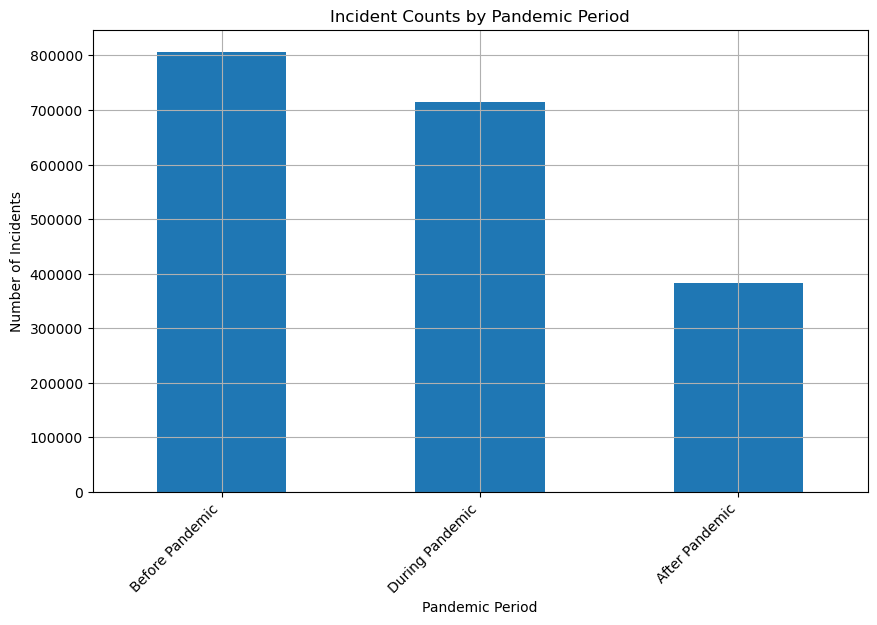

In [18]:
# Group the output for charting 
incident_period_chart = prim_type.groupby('Pandemic Period').size()

# Plot the grouped data as a bar chart
plt.figure(figsize=(10, 6))
incident_period_chart.plot(kind='bar')

# Format the chart
plt.title('Incident Counts by Pandemic Period')
plt.xlabel('Pandemic Period')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Incident_Counts_by_Pandemic_Period.png')

# Display the chart
plt.show()

In [19]:
incident_frequency = crime_location_data.groupby(['Block', 'Pandemic Period']).size()

incident_frequency.sort_values(ascending=False)

C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\50497946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_frequency = crime_location_data.groupby(['Block', 'Pandemic Period']).size()


Block                 Pandemic Period
001XX N STATE ST      Before Pandemic    3095
                      During Pandemic    1686
008XX N MICHIGAN AVE  Before Pandemic    1531
0000X W TERMINAL ST   During Pandemic    1425
0000X N STATE ST      Before Pandemic    1298
                                         ... 
064XX W SOMERSET AVE  Before Pandemic       0
064XX W SCHOOL ST     After Pandemic        0
                      During Pandemic       0
064XX W Raven St      After Pandemic        0
060XX N MC LEOD AVE   After Pandemic        0
Length: 112347, dtype: int64

In [20]:
# This means that the highest number of incidents on a single block in a single pandemic period is 3095
# Thus we make this the value by which to measure the size of our dots. lets save it into a variable
mdb_incident_count = 3095 # mdb stands for most dangerous block

In [21]:
# Define the order of the periods (so the output is printed in order)
period_order = ['Before Pandemic', 'During Pandemic', 'After Pandemic']

# Initialize a dictionary to store outlier values for each period
outliers_dict = {}

# Setting up a empty list for later plotting
all_incident_counts = []

# Loop through each period label in the defined order
for period in period_order:
    print(f"Analyzing data for {specific_value.lower()} incidents that occurred {period}\n")
    
    # Filter the data for the current period
    period_data = crime_location_data[crime_location_data['Pandemic Period'] == period]

    # Check the total of the unique value counts for each block during this period
    incident_counts = period_data['Block'].value_counts()
    
    # Remove all blocks with 0 incidents
    incident_counts = incident_counts[incident_counts > 0]

    # After this is calculated, add all those values into the empty list as a sub-list
    all_incident_counts.append(incident_counts.to_list())
    # with this line of code, I can now move the plotting code outside of the loop and plot each period in one chart at the end

    # Calculate Quartile Values for a Boxplot
    quartiles = incident_counts.quantile([0.25, 0.5, 0.75, 1.0])
    lowerq = quartiles[0.25]  # Lower quartile
    upperq = quartiles[0.75]  # Upper quartile
    iqr = upperq - lowerq     # Interquartile range

    # Calculate bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print combined output for quartile calculations
    print(
        f"The lower quartile of {specific_value.lower()} incidents is: {lowerq}\n"
        f"The upper quartile of {specific_value.lower()} incidents is: {upperq}\n"
        f"The interquartile range of {specific_value.lower()} incidents is: {iqr}\n"
        f"Values below {lower_bound} could be outliers.\n"
    )

    # Print combined output for ease of access to important information
    print(
        f"\nIMPORTANT:\n"
        f"\nThis is the outlier data, which we will need to calculate hot spots.\n"
        f"Thus, blocks with values above {upper_bound} are data points that we need to filter for."
    )
    
    # Input upper bound outlier values into a dictionary for each period
    outliers_dict[period] = upper_bound

    # Filter period data to keep only rows where the block incident counts are above the upper bound
    outlier_blocks = incident_counts[incident_counts > upper_bound].index
    period_outliers_df = period_data[period_data['Block'].isin(outlier_blocks)]

    # Uses period label to create a new df to store the new created outliers dataframe
    globals()[f"{period.replace(' ', '_')}_outliers_df"] = period_outliers_df

    print("="*75)  # Separator between different periods


Analyzing data for all crimes incidents that occurred Before Pandemic

The lower quartile of all crimes incidents is: 4.0
The upper quartile of all crimes incidents is: 28.0
The interquartile range of all crimes incidents is: 24.0
Values below -32.0 could be outliers.


IMPORTANT:

This is the outlier data, which we will need to calculate hot spots.
Thus, blocks with values above 64.0 are data points that we need to filter for.
Analyzing data for all crimes incidents that occurred During Pandemic

The lower quartile of all crimes incidents is: 4.0
The upper quartile of all crimes incidents is: 26.0
The interquartile range of all crimes incidents is: 22.0
Values below -29.0 could be outliers.


IMPORTANT:

This is the outlier data, which we will need to calculate hot spots.
Thus, blocks with values above 59.0 are data points that we need to filter for.
Analyzing data for all crimes incidents that occurred After Pandemic

The lower quartile of all crimes incidents is: 3.0
The upper quart

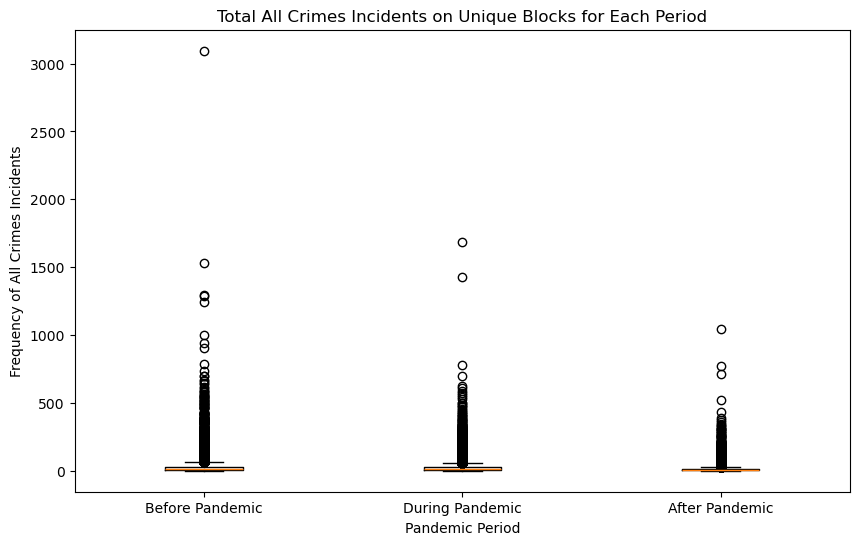

{'Before Pandemic': 64.0, 'During Pandemic': 59.0, 'After Pandemic': 30.5}


In [22]:

# Make a chart with 3 boxplots, one for each period that was calculated above
fig, ax = plt.subplots(figsize=(10,6)) # Alter figsize if needed (width, height)
ax.boxplot(all_incident_counts, tick_labels=period_order) # Sets up labels for chart

# Now set up formatting
ax.set_title(f"Total {specific_value.title()} Incidents on Unique Blocks for Each Period")
ax.set_xlabel(f"Pandemic Period")
ax.set_ylabel(f"Frequency of {specific_value.title()} Incidents")

# Display the Chart
plt.show()

# Finally, print out the outliers_dict to show the outlier values at the very bottom
print(outliers_dict)

In [23]:
# Check new that new outlier pandas DataFrames exist
print(Before_Pandemic_outliers_df.head(1))
print(During_Pandemic_outliers_df.head(1))
print(After_Pandemic_outliers_df.head(1))

                  Date Primary Type      Description Location Description  \
32 2019-04-21 12:30:00      ROBBERY  ARMED - HANDGUN            RESIDENCE   

              Block  Year  Arrest   Latitude  Longitude  Pandemic Period  
32  009XX E 80TH ST  2019   False  41.749508 -87.600589  Before Pandemic  
                 Date         Primary Type Description Location Description  \
8 2022-03-24 17:07:00  MOTOR VEHICLE THEFT  AUTOMOBILE          GAS STATION   

                Block  Year  Arrest   Latitude  Longitude  Pandemic Period  
8  012XX S WABASH AVE  2022   False  41.867014 -87.625809  During Pandemic  
                 Date Primary Type  \
3 2023-11-12 07:59:00      BATTERY   

                                         Description Location Description  \
3  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   SMALL RETAIL STORE   

                       Block  Year  Arrest   Latitude  Longitude  \
3  086XX S COTTAGE GROVE AVE  2023    True  41.738009 -87.604834   

  Pandemic Pe

#### Step 4: Get the outlier values of the new outlier dataframes 
Because these data points would be the outliers of the outliers, I think that we can define them as "**Hotspots**"

In [24]:
# This code follows the exact steps as the code above to find the outliers of the outlier dataframe, which is our definition of a hotspot
# The only things that changed are the varible names, the zipped loop, and we are referencing the new dataframes we created in the last step
# to remove the filtering step
outlier_dataframes = ['Before_Pandemic_outliers_df', 'During_Pandemic_outliers_df', 'After_Pandemic_outliers_df']

# Initialize a dictionary and list
outer_outlier_dict = {}
outer_outlier_incident_counts = []

# This zips the outlier_dataframes and period_order together. I did this because I wanted to be able to reference the period in this loop
# I tried a nested loop and that was outputting 9 different analysis. Thus, the zipped loop gets rid of that problem
for period_df, period in zip(outlier_dataframes, period_order):
    
    # Gets the current outlier dataframe and assign it to a new variable
    outer_outlier_df = globals().get(period_df)

    print(f"Analyzing data for {specific_value.lower()} incidents that occurred {period}\n")

    # Calculate the unique value counts for each block within this period-specific DataFrame
    outer_outlier_data = outer_outlier_df['Block'].value_counts()
    outer_outlier_incident_counts.append(outer_outlier_data.to_list())

    # Calculate the quartile values for plotting boxplots
    quartiles = outer_outlier_data.quantile([0.25, 0.5, 0.75, 1.0])
    lowerq = quartiles[0.25]  # Lower quartile
    upperq = quartiles[0.75]  # Upper quartile
    iqr = upperq - lowerq     # Interquartile range

    # Calculate bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print combined output for quartile calculations
    print(
        f"The lower quartile of {specific_value.lower()} incidents is: {lowerq}\n"
        f"The upper quartile of {specific_value.lower()} incidents is: {upperq}\n"
        f"The interquartile range of {specific_value.lower()} incidents is: {iqr}\n"
        f"Values below {lower_bound} could be outliers.\n"
    )

    # Print combined output for hotspot calculations
    print(
        f"\nIMPORTANT:\n"
        f"\nThis is the data that I think defines a 'Hotspot', which is going to be all values that are the outliers of the outliers.\n"
        f"Thus, blocks with incident count values above {upper_bound} are data points that we can now define as 'Hotspots'."
    )
    
    # Input hotspot value into a dictionary for each period
    outer_outlier_dict[period] = upper_bound

    # Filter period data to keep only rows where block counts are above the upper bound
    hotspot_blocks = outer_outlier_data[outer_outlier_data > upper_bound].index
    hotspots_df = outer_outlier_df[outer_outlier_df['Block'].isin(hotspot_blocks)]
    
    # Store the filtered DataFrame back into globals for further analysis if needed
    globals()[f"{period.replace(' ', '_')}_hotspots_df"] = hotspots_df

    print("=" * 75)  # Separator between different periods




Analyzing data for all crimes incidents that occurred Before Pandemic

The lower quartile of all crimes incidents is: 76.0
The upper quartile of all crimes incidents is: 137.0
The interquartile range of all crimes incidents is: 61.0
Values below -15.5 could be outliers.


IMPORTANT:

This is the data that I think defines a 'Hotspot', which is going to be all values that are the outliers of the outliers.
Thus, blocks with incident count values above 228.5 are data points that we can now define as 'Hotspots'.
Analyzing data for all crimes incidents that occurred During Pandemic

The lower quartile of all crimes incidents is: 70.0
The upper quartile of all crimes incidents is: 119.0
The interquartile range of all crimes incidents is: 49.0
Values below -3.5 could be outliers.


IMPORTANT:

This is the data that I think defines a 'Hotspot', which is going to be all values that are the outliers of the outliers.
Thus, blocks with incident count values above 192.5 are data points that we can n

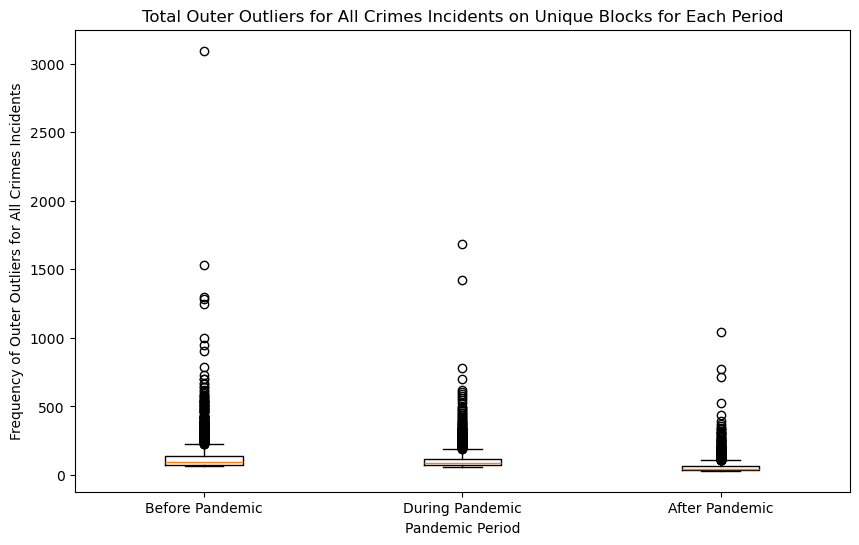

{'Before Pandemic': 228.5, 'During Pandemic': 192.5, 'After Pandemic': 108.5}


In [25]:
# Make a chart with 3 boxplots, one for each period that was calculated above
fig, ax = plt.subplots(figsize=(10,6)) # Alter figsize if needed (width, height)
ax.boxplot(outer_outlier_incident_counts, tick_labels=period_order) # Keeps labels consistent in both charts

# Now set up formatting
ax.set_title(f"Total Outer Outliers for {specific_value.title()} Incidents on Unique Blocks for Each Period")
ax.set_xlabel(f"Pandemic Period")
ax.set_ylabel(f"Frequency of Outer Outliers for {specific_value.title()} Incidents")

# Save the chart for presentation
# plt.savefig('Data_viz_output/Hotspot_Calculation_Chart.png')

# Display the Chart
plt.show()

# Finally, print out the outliers_dict to show the outlier values at the very bottom
print(outer_outlier_dict)

In [26]:
# Check new that new hotspot pandas DataFrames exist
print(Before_Pandemic_hotspots_df.head(1))
print(During_Pandemic_hotspots_df.head(1))
print(After_Pandemic_hotspots_df.head(1))

                    Date Primary Type Description  \
1511 2019-07-21 14:00:00        THEFT   OVER $500   

                        Location Description            Block  Year  Arrest  \
1511  PARKING LOT / GARAGE (NON RESIDENTIAL)  002XX W 87TH ST  2019   False   

       Latitude  Longitude  Pandemic Period  
1511  41.736148  -87.62907  Before Pandemic  
                 Date         Primary Type Description Location Description  \
8 2022-03-24 17:07:00  MOTOR VEHICLE THEFT  AUTOMOBILE          GAS STATION   

                Block  Year  Arrest   Latitude  Longitude  Pandemic Period  
8  012XX S WABASH AVE  2022   False  41.867014 -87.625809  During Pandemic  
                 Date Primary Type  \
3 2023-11-12 07:59:00      BATTERY   

                                         Description Location Description  \
3  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   SMALL RETAIL STORE   

                       Block  Year  Arrest   Latitude  Longitude  \
3  086XX S COTTAGE GROVE AVE 

#### Step 4: Plot the newly defined "**Hot Spots**"
Now that we have our hot spots defined it is time to plot them on charts

In [27]:
# Initialize a list for to reference each new hotspot dataframe
hotspot_dfs = ['Before_Pandemic_hotspots_df', 'During_Pandemic_hotspots_df', 'After_Pandemic_hotspots_df']

# Added a empty list to add data I want to plot later
hotspot_incident_list = []

# Loop through each period-specific outlier DataFrame to generate maps
for hotspot_df, period in zip(hotspot_dfs, period_order):
    
    # Get the current hotspot dataframe for plotting
    hotspot_data = globals().get(hotspot_df).copy()
    
    print(f"Mapping Chicago Hotspots for {specific_value.title()} Incidents {period}\n")

    # Calculate unique value counts for each 'Block' in this period-specific DataFrame
    hotspot_incident_count = hotspot_data['Block'].value_counts()

    # Merge the incident count with the original data based on 'Block'
    hotspot_data = hotspot_data.merge(hotspot_incident_count, left_on='Block', right_index=True, how='left')

    # Rename the resulting column to 'Block_Count' if necessary
    hotspot_data = hotspot_data.rename(columns={'count': 'Block Count'})

    # Create a new variable grouping the lat, lon, and block for plotting
    hotspot_blocks = hotspot_data.groupby(['Block'], as_index=False).agg({'Block Count': 'max', 'Latitude': 'max', 'Longitude': 'max'})

    globals()[f"{period.replace(' ', '_')}_full_hotspot_df"] = hotspot_blocks

    # Calculate sizes based on unique counts for scaled visual effect
    hotspot_blocks['Point Size'] = hotspot_blocks['Block Count'] / mdb_incident_count * 100 # Ensure the scaling is done properly
    hotspot_blocks['Point Size'] = hotspot_blocks['Point Size'] * 2 # Increase the value if hotspots are not well displayed

    # Display map-based plot for Chicago hotspots with `hvplot.points`
    map_plot = hotspot_blocks.hvplot.points(
        'Longitude',
        'Latitude',
        geo=True,
        tiles='CartoLight',  # Enable map background
        color='blue', # Change Color
        alpha=0.75, # Change the transparency
        size='Point Size', # The more incidents that occur, the bigger the point will be on the map
        title=f"Chicago {specific_value.title()} Hotspots {period}", 
        xlabel="Longitude", 
        ylabel="Latitude", 
        frame_width=800, 
        frame_height=600,
        sizing_mode='fixed',
        hover_cols=['Block', 'Block Count', 'Latitude', 'Longitude']
    )

    display(map_plot)  # hvplot.points uses display instead of plt.show()

    # hvplot.save(map_plot, f"Data_viz_output/Chicago_{specific_value.title()}_Hotspots_{period.replace(' ', '_')}.png", fmt="png")

    print('=' * 150)  # Separator between different charts



Mapping Chicago Hotspots for All Crimes Incidents Before Pandemic



c:\Users\qjone\anaconda3\envs\dev\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Point Size,Block,Block Count)

Mapping Chicago Hotspots for All Crimes Incidents During Pandemic



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Point Size,Block,Block Count)

Mapping Chicago Hotspots for All Crimes Incidents After Pandemic



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Point Size,Block,Block Count)

### Season Analysis
We noticed that, up above, there seems to be some trends in the data that follow a rise and fall in a predictable fashion. We assumed that it was due to the differences in weather during different seasons. This part of the analysis sets out to prove that. 

In [28]:
# Create a copy of the dataframe to work with
df = crime_location_data.copy()

# We need to convert 'Date' column to datetime format in the new, filtered dataframe
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Create column for season
df['Season'] = np.where(df['Date'].dt.month == 1, 'Winter',
                      np.where(df['Date'].dt.month == 2, 'Winter',
                      np.where(df['Date'].dt.month == 3, 'Spring',
                      np.where(df['Date'].dt.month == 4, 'Spring',
                      np.where(df['Date'].dt.month == 5, 'Spring',
                      np.where(df['Date'].dt.month == 6, 'Summer',
                      np.where(df['Date'].dt.month == 7, 'Summer',
                      np.where(df['Date'].dt.month == 8, 'Summer',
                      np.where(df['Date'].dt.month == 9, 'Fall',
                      np.where(df['Date'].dt.month == 10, 'Fall',
                      np.where(df['Date'].dt.month == 11, 'Fall',
                      np.where(df['Date'].dt.month == 12, 'Winter', 'Unknown'))))))))))))

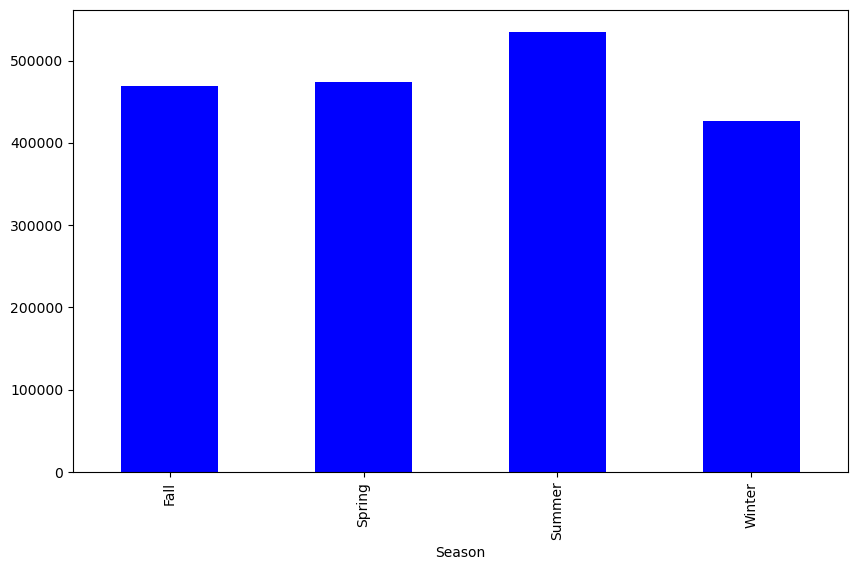

In [29]:
# Bar chart for crime incidents by season
season_count = df.groupby( 'Season').size()
season_count.plot(kind='bar', figsize=(10,6), color='blue')

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Seasonality_Component.png')

# Display the chart
plt.show()

Text(0, 0.5, 'Arrests')

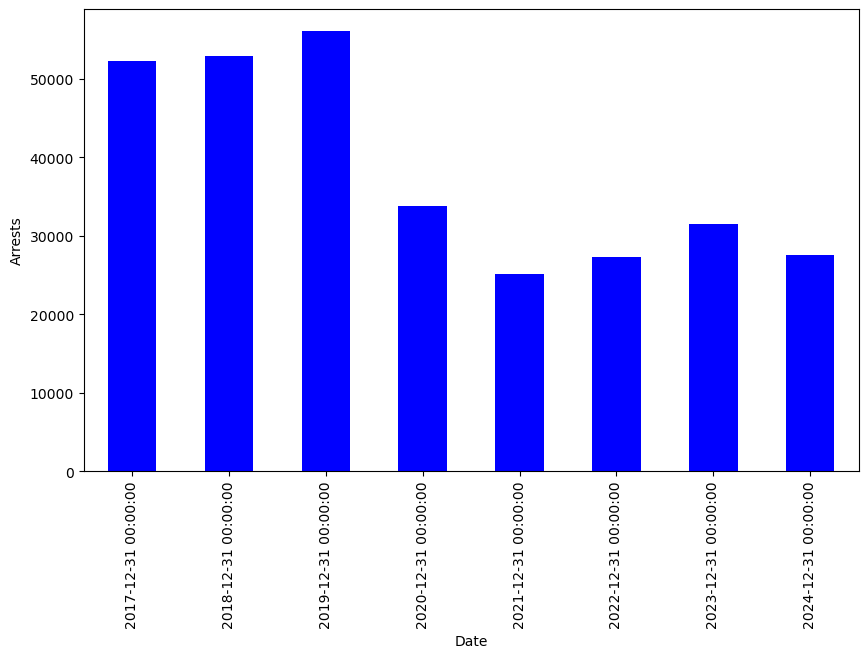

In [30]:
# Dataframe for incidents leading to arrests and bar chart for arrests per year
all_arrests = df[df['Arrest'] == 1]
all_arrests.head()
all_arrests.set_index('Date', inplace=True)
arrests = all_arrests.resample('YE').size()
arrests.plot(kind='bar', figsize=(10,6), color='blue')
plt.ylabel('Arrests')

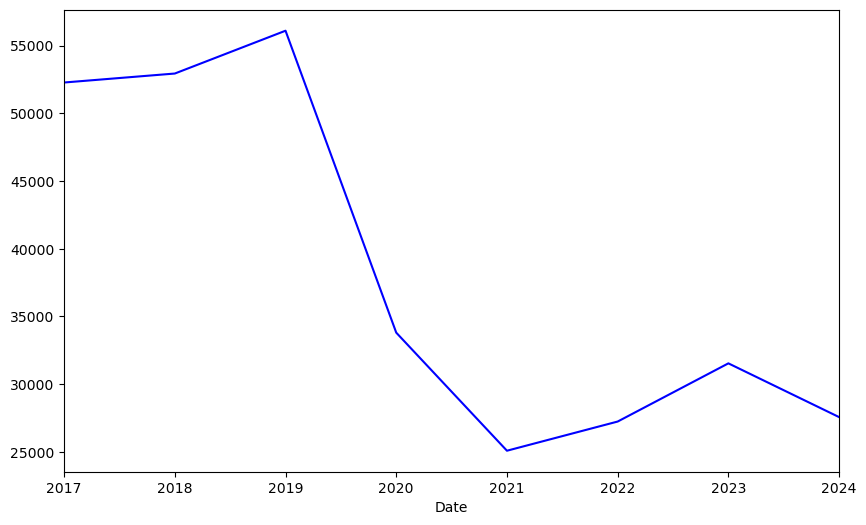

In [31]:
# Save simple chart we forgot
arrests.plot(kind='line', figsize=(10,6), color='blue')

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Arrests_Over_Time.png')

# Display the chart
plt.show()

In [32]:
# Create a new dataframe and a column for a percentage of incidents leading to arrest per year
percentage_true = df.groupby('Year')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
percentage_true['percentage_true'] = (percentage_true['true_count'] / percentage_true['total_count']) * 100
percentage_true

,Year,total_count,true_count,percentage_true
0,2017,264964,52280,19.730982
1,2018,263552,52943,20.088256
2,2019,259158,56105,21.648955
3,2020,207947,33805,16.256546
4,2021,202857,25084,12.365361
5,2022,234879,27239,11.597035
6,2023,261932,31537,12.040148
7,2024,208729,27567,13.207077


In [33]:
# Create a new dataframe and a column for a percentage of incidents leading to arrest per pandemic period
period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
period_percentage_true['percentage_true'] = (period_percentage_true['true_count'] / period_percentage_true['total_count']) * 100
period_percentage_true

C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\956274627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(


,Pandemic Period,total_count,true_count,percentage_true
0,Before Pandemic,806624,165693,20.541541
1,During Pandemic,714420,92672,12.971641
2,After Pandemic,382974,48195,12.584405


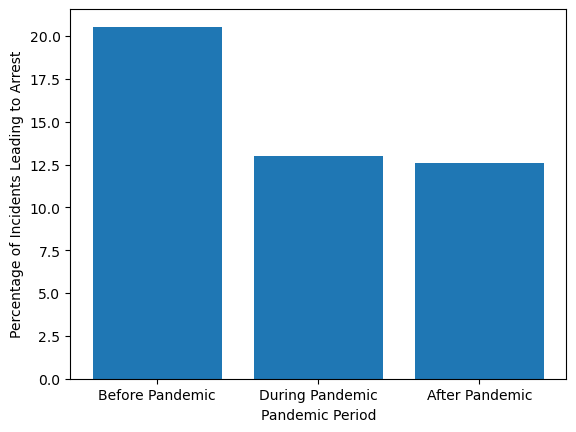

In [34]:
# Bar chart for percentage of incidents leading to arrest per pandemic period
plt.bar(period_percentage_true['Pandemic Period'], period_percentage_true['percentage_true'], label='Total')
plt.xlabel('Pandemic Period')
plt.ylabel('Percentage of Incidents Leading to Arrest')

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Incident_Counts_by_Pandemic_Period.png')

# Display the chart
plt.show()

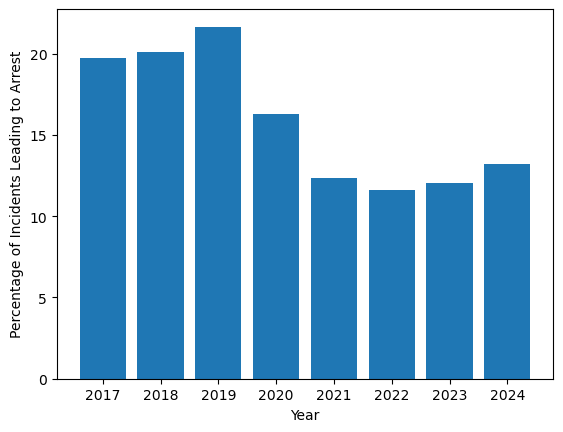

In [35]:
# Bar chart for percentage of incidents leading to arrest per year
plt.bar(percentage_true['Year'], percentage_true['percentage_true'], label='Total')
plt.xlabel('Year')
plt.ylabel('Percentage of Incidents Leading to Arrest')

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Percentage_of_Incidents_Leading_to_Arrest.png')

# Display the chart
plt.show()

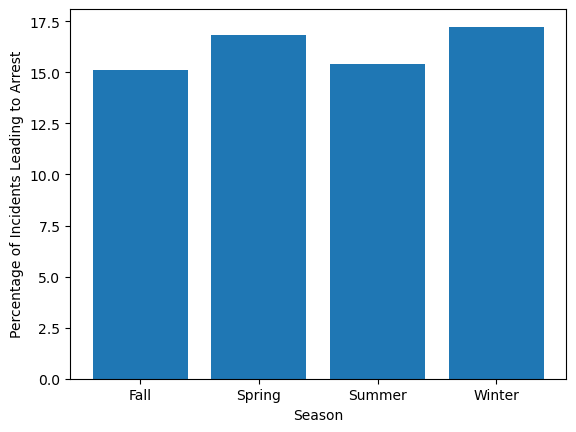

In [36]:
# Dataframe for arrests per season and bar chart for percentage of incidents leading to arrest per season
season_percentage_true = df.groupby('Season')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
season_percentage_true['percentage_true'] = (season_percentage_true['true_count'] / season_percentage_true['total_count']) * 100
plt.bar(season_percentage_true['Season'], season_percentage_true['percentage_true'], label='Total')
plt.xlabel('Season')
plt.ylabel('Percentage of Incidents Leading to Arrest')

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Percentage_of_Incidents_Leading_to_Arrest_by_Season.png')

# Display the chart
plt.show()

In [37]:
# Create a copy for analysis
df = crime_location_data.copy()

# Filter data for the "During Pandemic" period
during_pandemic_data = df[df['Pandemic Period'] == 'During Pandemic']
# Extract year and month
during_pandemic_data['Year-Month'] = during_pandemic_data['Date'].dt.to_period('M')

C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\3614133236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_pandemic_data['Year-Month'] = during_pandemic_data['Date'].dt.to_period('M')


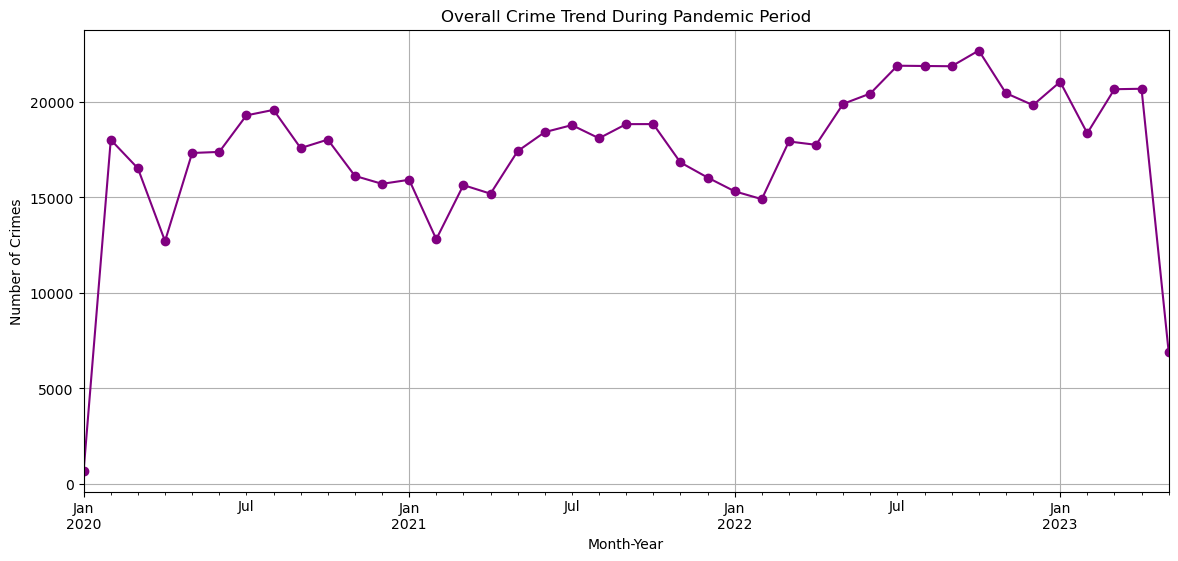

In [38]:
# Overall crime trend during the pandemic period
overall_crime_trend = during_pandemic_data['Year-Month'].value_counts().sort_index()
# Plot overall crime trend during the pandemic
plt.figure(figsize=(14, 6))
overall_crime_trend.plot(kind='line', marker='o', color='purple')
plt.title('Overall Crime Trend During Pandemic Period')
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.grid()

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Overall_Crime_Trend_During_Pandemic_period.png')

# Display the chart
plt.show()

C:\Users\qjone\AppData\Local\Temp\ipykernel_40644\1458536029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_crime_counts = df.groupby('Pandemic Period').size()


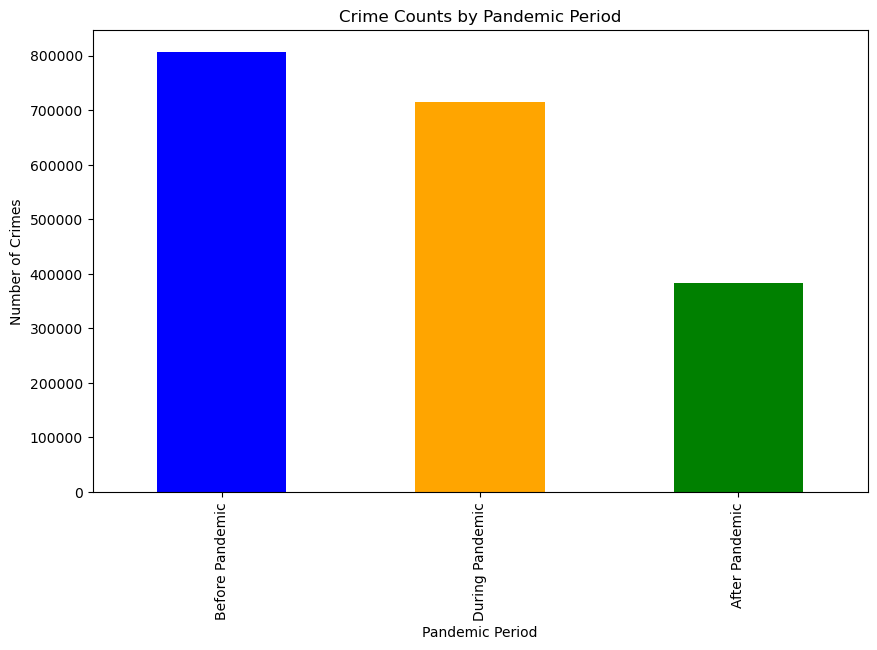

In [39]:
# Grouping crime data by Pandemic Period for trend analysis
period_crime_counts = df.groupby('Pandemic Period').size()

# Bar plot to visualize crime counts by pandemic period
period_crime_counts.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(10, 6))
plt.title("Crime Counts by Pandemic Period")
plt.xlabel("Pandemic Period")
plt.ylabel("Number of Crimes")

# Save the chart to the 'Data_viz_output' folder
plt.savefig('Data_viz_output/Crime_Count_by_Pandemic_period.png')

plt.show()